In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("/content/Amazon_final (1).csv", error_bad_lines=False)
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

<ipython-input-287-decf98bcecd7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("/content/Amazon_final (1).csv", error_bad_lines=False)


,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"Worst in working, battery not staying just one...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,Good but calling features not available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,From long time I was looking for entry level s...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,Good for daily use and specially for my kid. H...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,It's been a month that I bought this watch. It...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
df.shape

(34506, 4)

In [ ]:
# Drop rows containing NaN values
df.dropna(axis=0, inplace=True)

# Print the DataFrame after dropping NaN values
print("DataFrame after dropping rows with NaN values:")
print(df)
df['Reviews'] = df['Reviews'].str.replace(r'(Refurbished)', '')

DataFrame after dropping rows with NaN values:
                                          Name              Rating  \
0                                  Placeholder  3.0 out of 5 stars   
1      Good but calling features not available  3.0 out of 5 stars   
2                                       Nilesh  4.0 out of 5 stars   
3                                       kinjal  4.0 out of 5 stars   
4                                  Placeholder  4.0 out of 5 stars   
...                                        ...                 ...   
34501                        Nagen Kumar Sahoo  1.0 out of 5 stars   
34502                                Ramparida  1.0 out of 5 stars   
34503                               Indra Jeet  5.0 out of 5 stars   
34504                             Shivam Gupta  4.0 out of 5 stars   
34505                                       rj  1.0 out of 5 stars   

                                                 Reviews  \
0      Worst in working, battery not staying just on

<ipython-input-289-f5dc66b98365>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace(r'(Refurbished)', '')


In [ ]:
df.isna().sum()

Name       0
Rating     0
Reviews    0
Brand      0
dtype: int64

In [ ]:
df.columns

Index(['Name', 'Rating', 'Reviews', 'Brand'], dtype='object')

In [ ]:
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"Worst in working, battery not staying just one...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,Good but calling features not available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,From long time I was looking for entry level s...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,Good for daily use and specially for my kid. H...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,It's been a month that I bought this watch. It...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
df['Reviews'] = df['Reviews'].str.replace(r'(Refurbished)', '')
df['Brand'] = df['Reviews'].str.replace(r'(Refurbished)', '')
df['Name'] = df['Reviews'].str.replace(r'(Refurbished)', '')

<ipython-input-285-ae32b28f067b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace(r'(Refurbished)', '')
<ipython-input-285-ae32b28f067b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Brand'] = df['Reviews'].str.replace(r'(Refurbished)', '')
<ipython-input-285-ae32b28f067b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Reviews'].str.replace(r'(Refurbished)', '')


In [ ]:
df.isna().sum()

Name       0
Rating     0
Reviews    0
Brand      0
dtype: int64

In [ ]:
df.shape

(33734, 4)

In [ ]:
# Retry removing stopwords after downloading
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# It seems like the Reviews column contains some non-string values. Let's handle this before applying the stopwords removal

# Convert the Reviews column to string
df['Reviews'] = df['Reviews'].astype(str)

# Retrying removing stopwords now
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"Worst working, battery staying one hour","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,Good calling features available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,From long time I looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,Good daily use specially kid. He loves game co...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,It's month I bought watch. It's working good. ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# Download the Wordnet Lemmatizer from NLTK
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# 6. Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the words in the Reviews column
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"Worst working, battery staying one hour","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,Good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,From long time I looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,Good daily use specially kid. He love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,It's month I bought watch. It's working good. ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 7. Tokenization
from nltk.tokenize import word_tokenize

# Tokenize the words in the Reviews column
df['Reviews'] = df['Reviews'].apply(lambda x: word_tokenize(x))
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"[Worst, working, ,, battery, staying, one, hour]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,"[Good, calling, feature, available]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,"[From, long, time, I, looking, entry, level, s...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,"[Good, daily, use, specially, kid, ., He, love...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,"[It, 's, month, I, bought, watch, ., It, 's, w...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 8. Remove HTML tags - None, as this task is not applicable, there are no HTML tags in the Reviews

# 9. Convert emojis to text - We need to install the emoji package first
!pip install emoji

In [1]:
# Convert emojis to text
import emoji

# Convert emojis in the Reviews column to text
df['Reviews'] = df['Reviews'].apply(lambda x: [emoji.demojize(word)
                                               for word in x])
df.head()

NameError: name 'df' is not defined

In [ ]:
# 10. Expand contractions - for this, we need to first install the contractions package
!pip install contractions

In [ ]:
# Expand contractions
import contractions

# Expand contractions in the Reviews column
df['Reviews'] = df['Reviews'].apply(lambda x: [contractions.fix(word) for word in x])
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"[Worst, working, ,, battery, staying, one, hour]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,"[Good, calling, feature, available]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,"[From, long, time, I, looking, entry, level, s...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,"[Good, daily, use, specially, kid, ., He, love...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,"[It, 's, month, I, bought, watch, ., It, 's, w...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 11. Remove URLs
import re

# Some reviews might contain URLs which might not be necessary for the analysis. We can remove them
df['Reviews'] = df['Reviews'].apply(lambda x: [re.sub(r"http\S+|www\S+|https\S+", '', word, flags=re.MULTILINE) for word in x])
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"[Worst, working, ,, battery, staying, one, hour]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,"[Good, calling, feature, available]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,"[From, long, time, I, looking, entry, level, s...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,"[Good, daily, use, specially, kid, ., He, love...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,"[It, 's, month, I, bought, watch, ., It, 's, w...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 12. Remove numbers
# In many cases, numerical data doesn't add any value to the text data. We can remove those.
df['Reviews'] = df['Reviews'].apply(lambda x: [re.sub(r'\d+', '', word) for word in x])
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"[Worst, working, ,, battery, staying, one, hour]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,"[Good, calling, feature, available]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,"[From, long, time, I, looking, entry, level, s...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,"[Good, daily, use, specially, kid, ., He, love...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,"[It, 's, month, I, bought, watch, ., It, 's, w...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 13. Spell correction - It's quite computation intensive and may change words like names etc. So we'll skip this one

# 14. Convert text to lowercase
df['Reviews'] = df['Reviews'].apply(lambda x: [word.lower() for word in x])
df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,"[worst, working, ,, battery, staying, one, hour]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,"[good, calling, feature, available]","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,"[from, long, time, i, looking, entry, level, s...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,"[good, daily, use, specially, kid, ., he, love...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,"[it, 's, month, i, bought, watch, ., it, 's, w...","boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# 15. Remove extra whitespaces - As we have tokenized the reviews, this step is not applicable
# 16. Remove punctuation

df['Reviews'] = df['Reviews'].apply(lambda x: [re.sub(r'[^\w\s]', '', word) for word in x])

# 17. Remove non-alphanumeric characters (keeping the text and removing all other stuff)

df['Reviews'] = df['Reviews'].apply(lambda x: [re.sub(r'[^a-zA-Z]', ' ', word) for word in x])

# 18. Remove leading/trailing whitespaces
df['Reviews'] = df['Reviews'].apply(lambda x: [word.strip() for word in x])

# Combine the tokenized words back to sentences, to be used for analysis
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(word for word in x))

df.head()

,Name,Rating,Reviews,Brand
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di..."


In [ ]:
# Let's start by seeing the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33734 entries, 0 to 34505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     33734 non-null  object
 1   Rating   33734 non-null  object
 2   Reviews  33734 non-null  object
 3   Brand    33734 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
# Extracting numeric rating values from 'Rating' column
df['Rating_value'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype('float')

# Checking the DataFrame after extraction
df.head()

,Name,Rating,Reviews,Brand,Rating_value
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0


In [ ]:
# Checking the unique brands in the DataFrame
df['Brand'].unique()[0:2]

array(['boAt Wave Prime47 Smart Watch with 1.69" HD Display, 700+ Active Modes, ASAP Charge, Live Cricket Scores, Crest App Health Ecosystem, HR & SpO2 Monitoring(Royal Blue)',
       'boAt Ultima Call Smart Watch with 1.83" HD Display,Advanced BT Calling,DIY Watch Face Studio, Coins,700+Active Modes,10 Days Battery Life,HR&SpO2 Monitor,Energy&Sleep Score(Cherry Blossom)'],
      dtype=object)

In [ ]:
# The 'Brand' column seems to contain some details beyond the brand name (storage, color, RAM)
# Let's extract the brand name from this text

df['Brand_name'] = df['Brand'].str.extract('([a-zA-Z0-9\s]+)', expand=False).str.strip()

# Checking the DataFrame after extraction
df.head()

,Name,Rating,Reviews,Brand,Rating_value,Brand_name
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1


In [ ]:
# Checking for the unique brands
df['Brand_name'].value_counts()

Refurbished                                  921
boAt Lunar Orb with 1                        806
Redmi Note 10S                               703
Apple iPhone 15 Plus                         644
Apple iPhone 15 Pro                          620
                                            ... 
realme 12 Pro 5G                               7
realme TechLife Watch S100 1                   7
boAt Lunar Fit Smart Watch with 1              5
boAt Lunar Connect Ace Smart Watch with 1      4
Realme C25                                     2
Name: Brand_name, Length: 210, dtype: int64

In [ ]:
df['Reviews']

0                  worst working  battery staying one hour
1                           good calling feature available
2        from long time i looking entry level smart wat...
3        good daily use specially kid  he love game com...
4        it s month i bought watch  it s working good  ...
                               ...                        
34501                                            very bade
34502                                       damage product
34503    background kaisa hai camera kaisa hai back pea...
34504    fabulousface savoring foodsparkles thanks mi m...
34505                                        wrost product
Name: Reviews, Length: 33734, dtype: object

<ipython-input-314-5e2eda4fb355>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


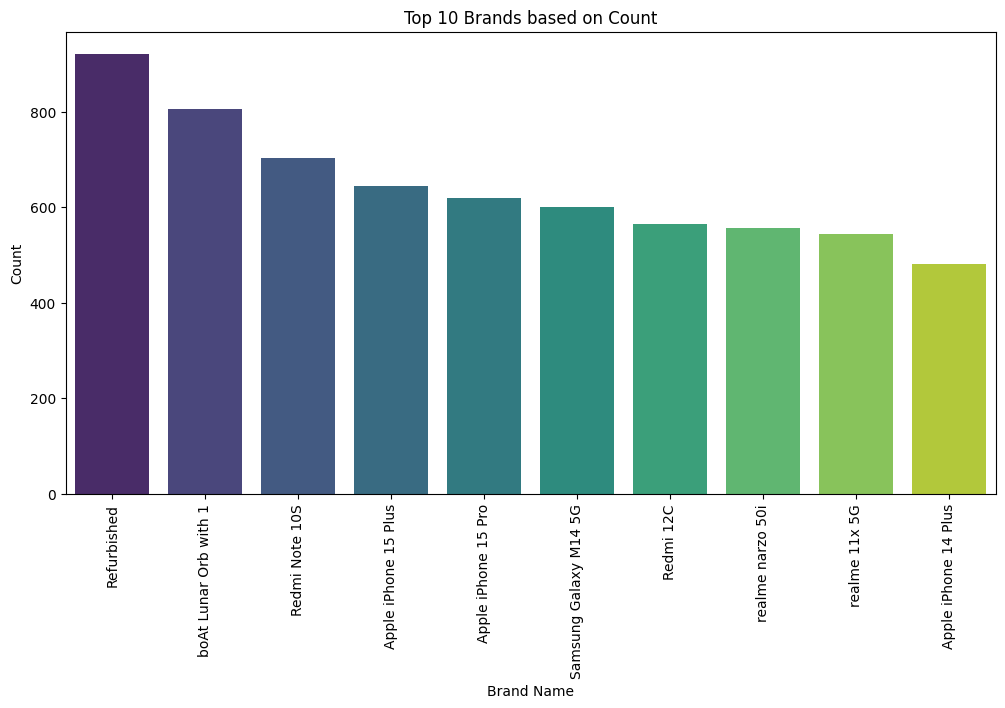

In [ ]:
# Importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Top 10 brands in the dataset based on count
top_brands = df['Brand_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Brands based on Count')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

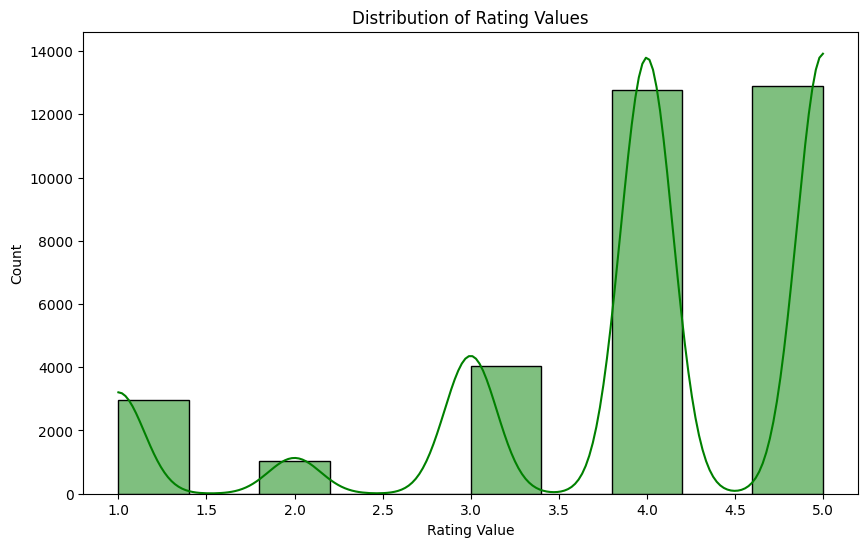

In [ ]:
# Plot 2: Distribution of Rating Values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Rating_value", bins=10, kde=True, color='green')
plt.title('Distribution of Rating Values')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

<ipython-input-316-3fc0fdcb72cc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_brands, x="Brand_name", y="Rating_value", palette='coolwarm')


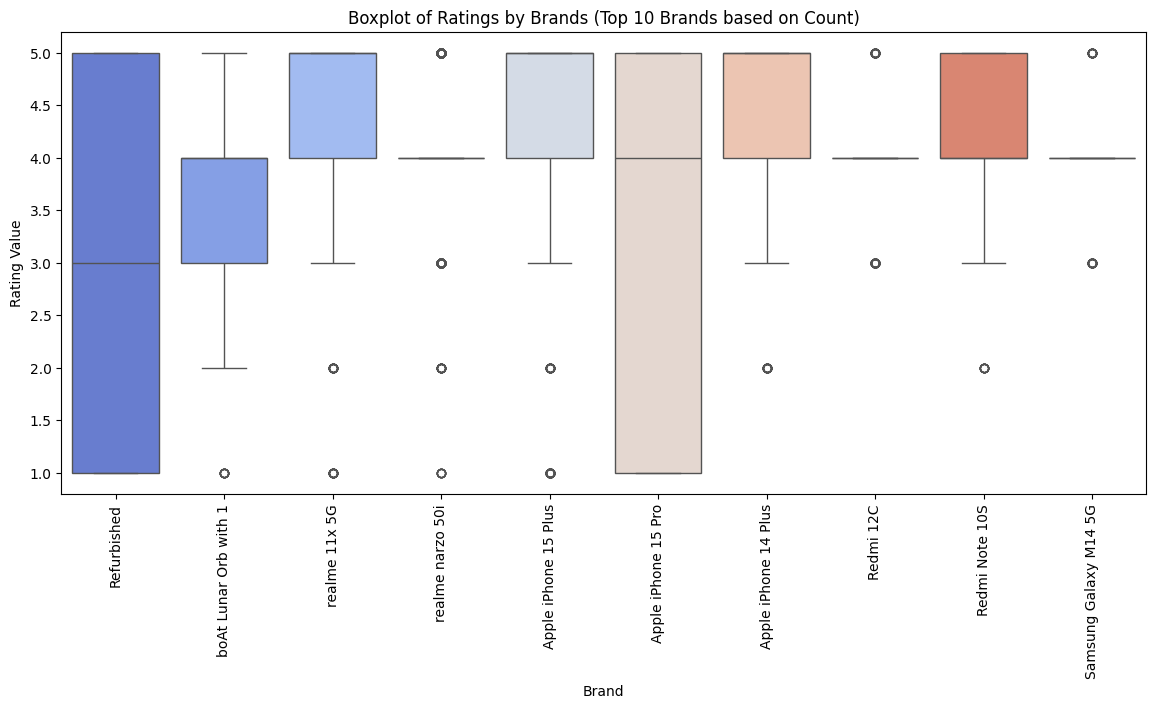

In [ ]:
# Plot 3: Boxplot of Ratings by Brands (for the top 10 brands based on count)
top_brands_list = top_brands.index.tolist()

# Creating a DataFrame for top 10 brands
df_top_brands = df[df['Brand_name'].isin(top_brands_list)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_brands, x="Brand_name", y="Rating_value", palette='coolwarm')
plt.title('Boxplot of Ratings by Brands (Top 10 Brands based on Count)')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Rating Value')
plt.show()

In [ ]:
# Additional feature extraction for more insightful visualizations
# Extracting the length of the reviews

df['Review_length'] = df['Reviews'].apply(lambda x: len(x.split()))

# Checking the DataFrame after extraction
df.head()

,Name,Rating,Reviews,Brand,Rating_value,Brand_name,Review_length
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,6
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,4
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,57
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,19
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,29


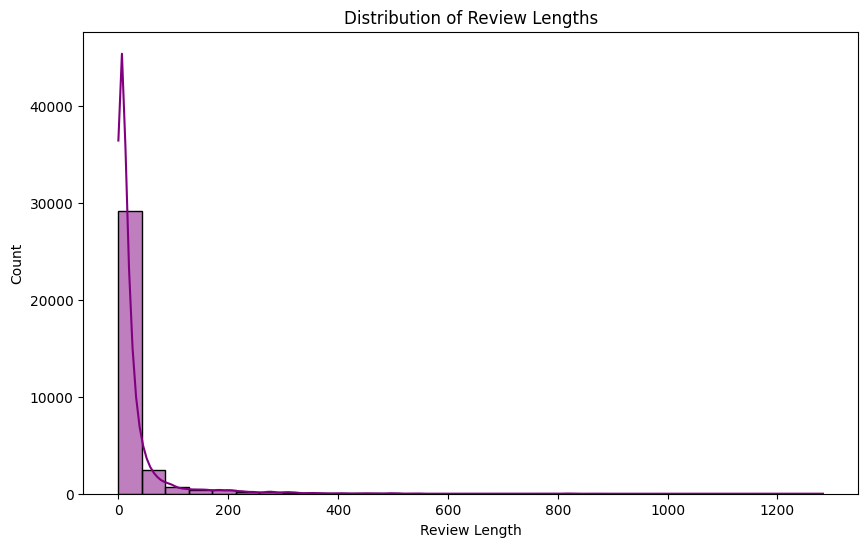

In [ ]:
# Plot 4: Distribution of Review Lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Review_length", bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [ ]:

import numpy as np

# Now let's do the binning again
bins = [0, 50, 100, 150, 200, 300, 500, np.inf]
labels = ['<50', '50-100', '100-150', '150-200', '200-300', '300-500', '500+']

df['Review_length_bin'] = pd.cut(df['Review_length'], bins, labels=labels)

# Checking the DataFrame after binning
df.head()

,Name,Rating,Reviews,Brand,Rating_value,Brand_name,Review_length,Review_length_bin
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,6,<50
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,4,<50
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,57,50-100
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,19,<50
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,29,<50


<ipython-input-320-9c9307da2ac1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Review_length_bin", palette='plasma')


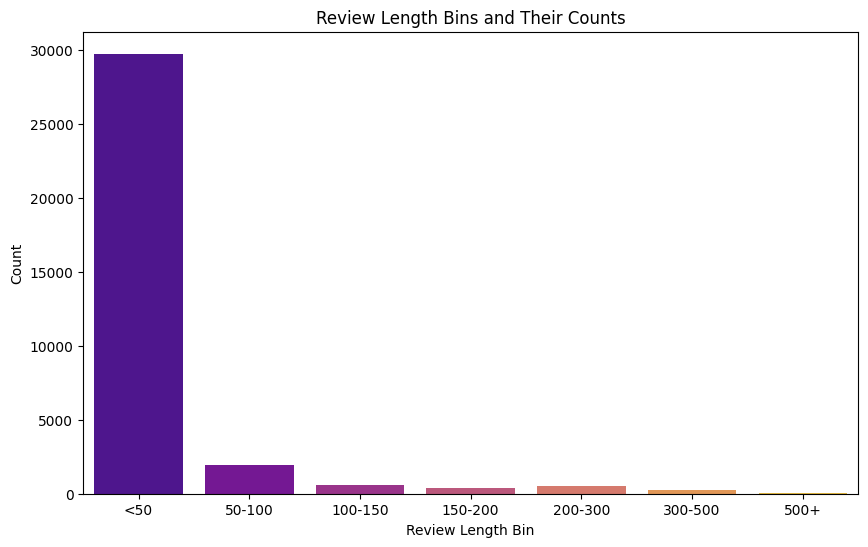

In [ ]:
# Plot 5: Review Length Bins and Their Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Review_length_bin", palette='plasma')
plt.title('Review Length Bins and Their Counts')
plt.xlabel('Review Length Bin')
plt.ylabel('Count')
plt.show()

<ipython-input-321-262c0ed6d6f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_avg_rating.index, y=top_brands_avg_rating.values, palette='magma')


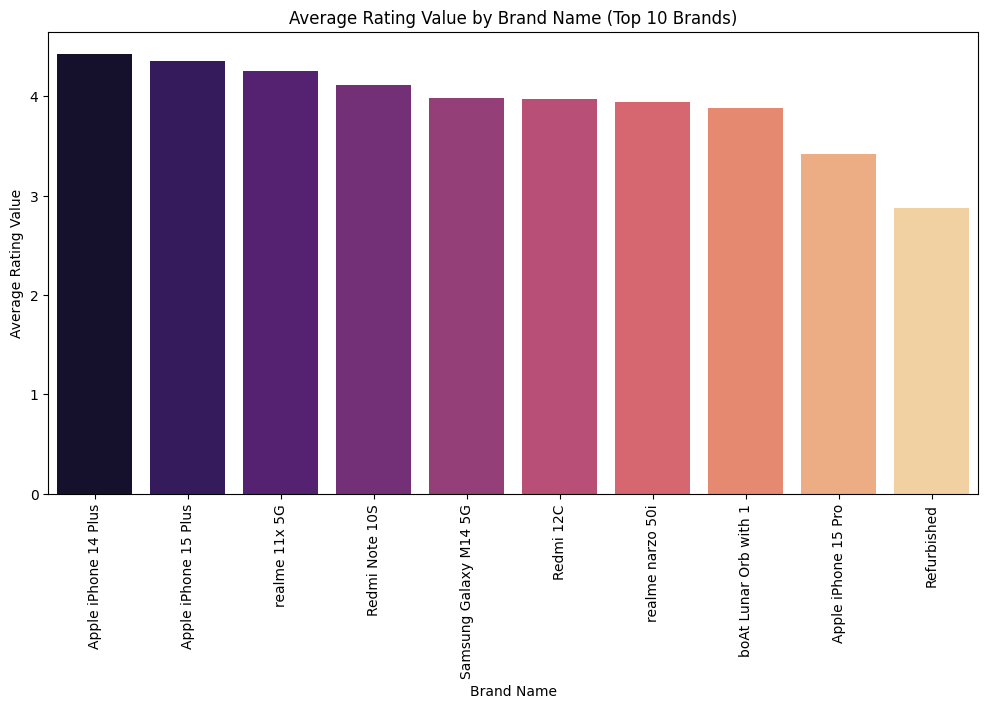

In [ ]:
# Plot 6: Average Rating Value by Brand Name (for top 10 brands)
plt.figure(figsize=(12, 6))
top_brands_avg_rating = df[df['Brand_name'].isin(top_brands_list)].groupby('Brand_name')['Rating_value'].mean().sort_values(ascending=False)
sns.barplot(x=top_brands_avg_rating.index, y=top_brands_avg_rating.values, palette='magma')
plt.title('Average Rating Value by Brand Name (Top 10 Brands)')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.ylabel('Average Rating Value')
plt.show()

<ipython-input-322-40d561cc0499>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Rating_value", palette='Set2')


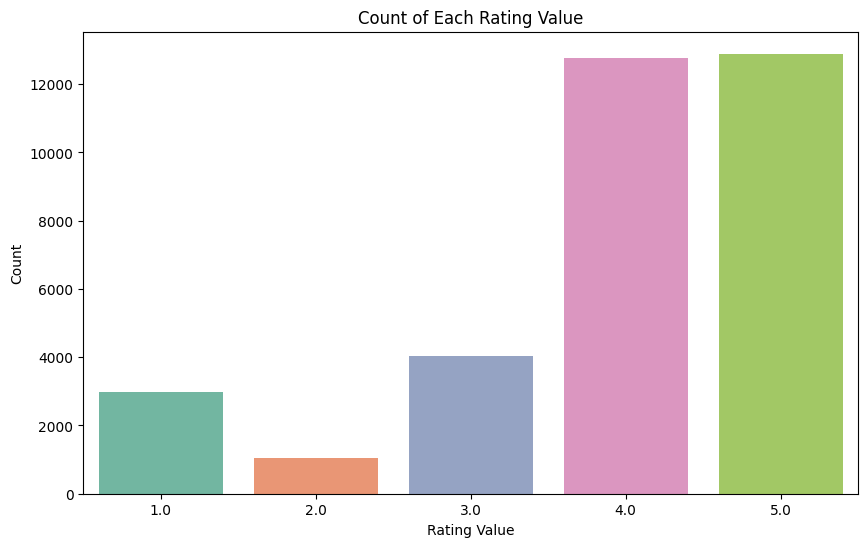

In [ ]:
# Plot 7: Count of Each Rating Value
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Rating_value", palette='Set2')
plt.title('Count of Each Rating Value')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

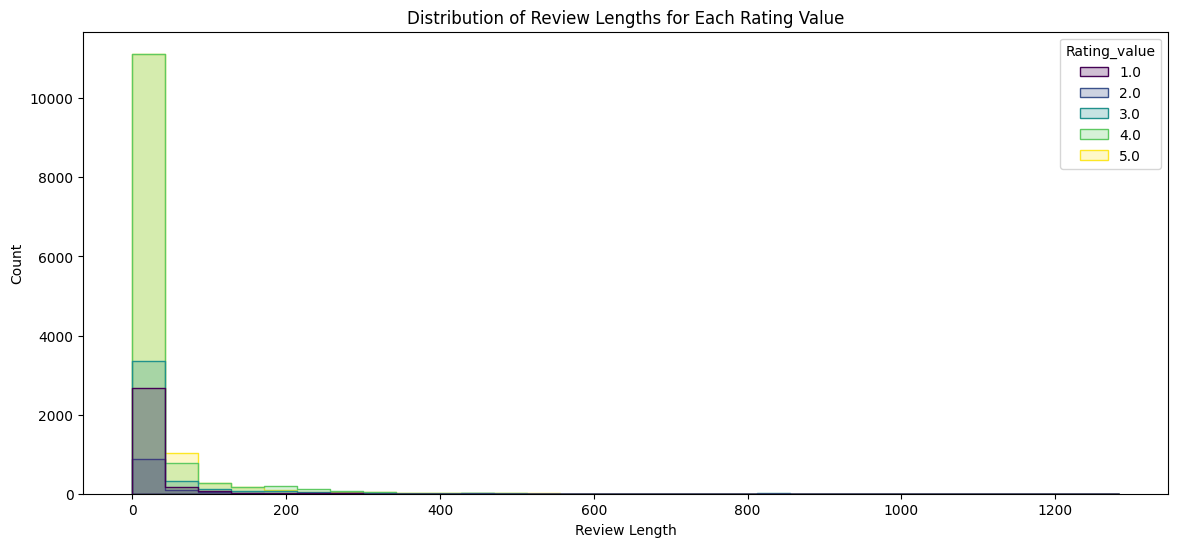

In [ ]:
# Plot 8: Distribution of Review Lengths for Each Rating Value
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="Review_length", hue="Rating_value", palette='viridis', element="step", bins=30)
plt.title('Distribution of Review Lengths for Each Rating Value')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install wordcloud

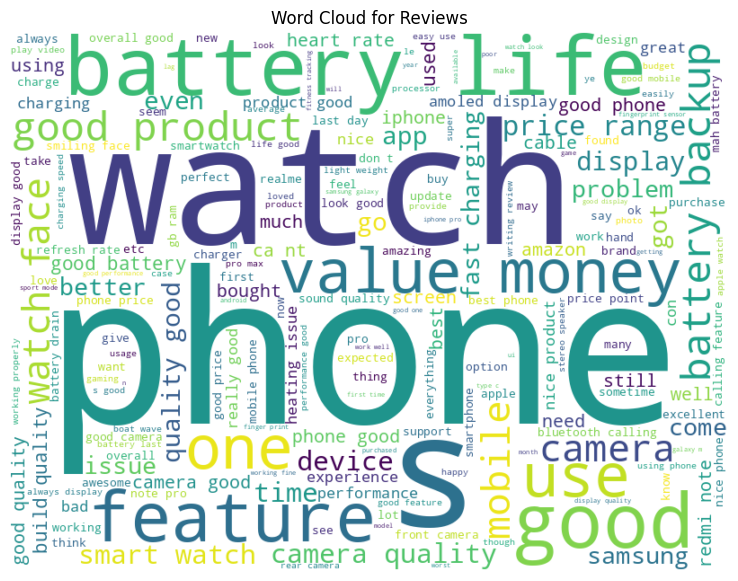

In [ ]:
# Plot 9: Word Cloud for Reviews after installing the package
from wordcloud import WordCloud

# Combining all reviews into one big text
reviews_text = ' '.join(df['Reviews'])
wordcloud = WordCloud(background_color='white', width=800, height=600).generate(reviews_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

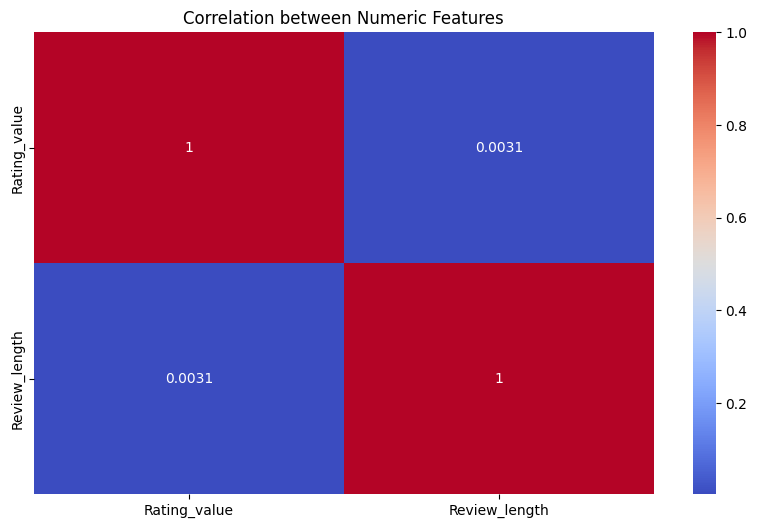

In [ ]:
# Plot 10: Heatmap showing correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Rating_value', 'Review_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()

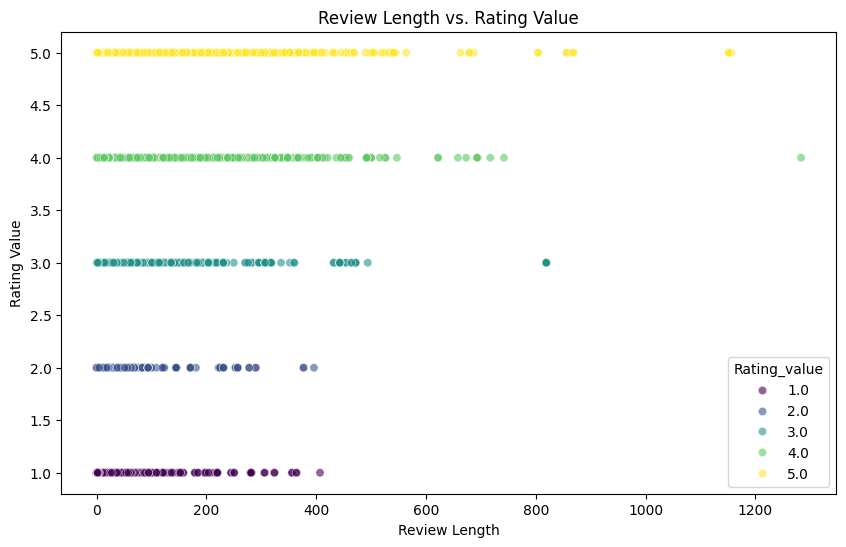

In [ ]:
# Plot 11: Scatterplot of Review Length vs. Rating Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Review_length", y="Rating_value", hue="Rating_value", palette="viridis", alpha=0.6)
plt.title('Review Length vs. Rating Value')
plt.xlabel('Review Length')
plt.ylabel('Rating Value')
plt.show()

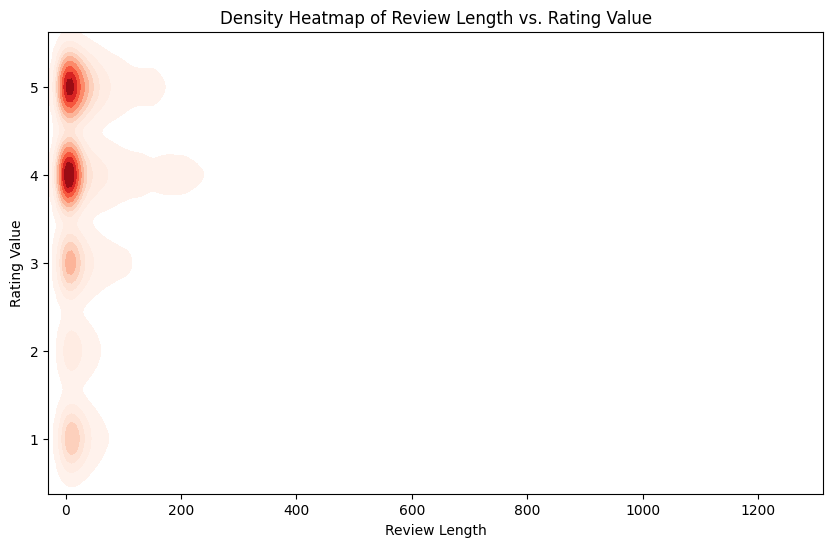

In [ ]:
# Plot 12: Density Heatmap of Review Length vs. Rating Value
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Review_length", y="Rating_value", cmap="Reds", fill=True)
plt.title('Density Heatmap of Review Length vs. Rating Value')
plt.xlabel('Review Length')
plt.ylabel('Rating Value')
plt.show()

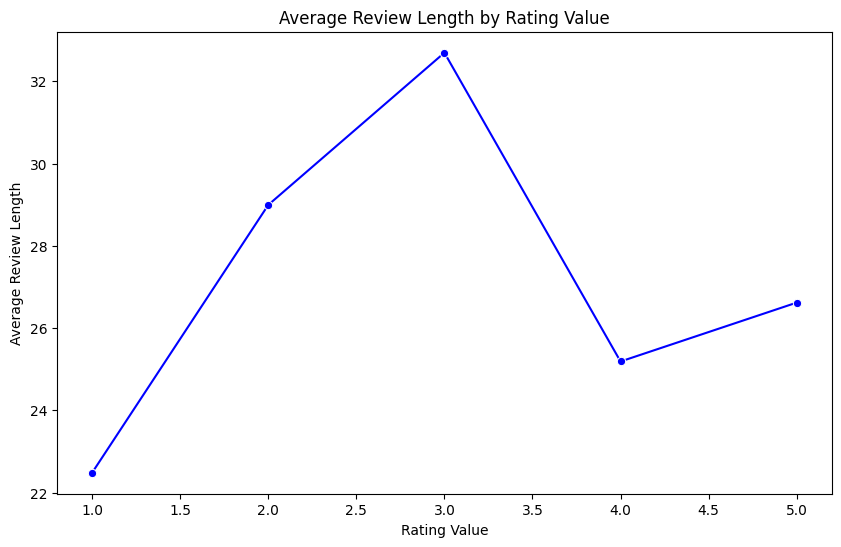

In [ ]:
# Plot 13: Line Plot for Average Review Length by Rating Value
avg_review_length_by_rating = df.groupby('Rating_value')['Review_length'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_review_length_by_rating, x='Rating_value', y='Review_length', marker='o', linestyle='-', color='blue')
plt.title('Average Review Length by Rating Value')
plt.xlabel('Rating Value')
plt.ylabel('Average Review Length')
plt.show()

<ipython-input-276-b10fd3cf6bff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Brand_name", y="Rating_value", data=df_top_5_brands, palette="Set3")


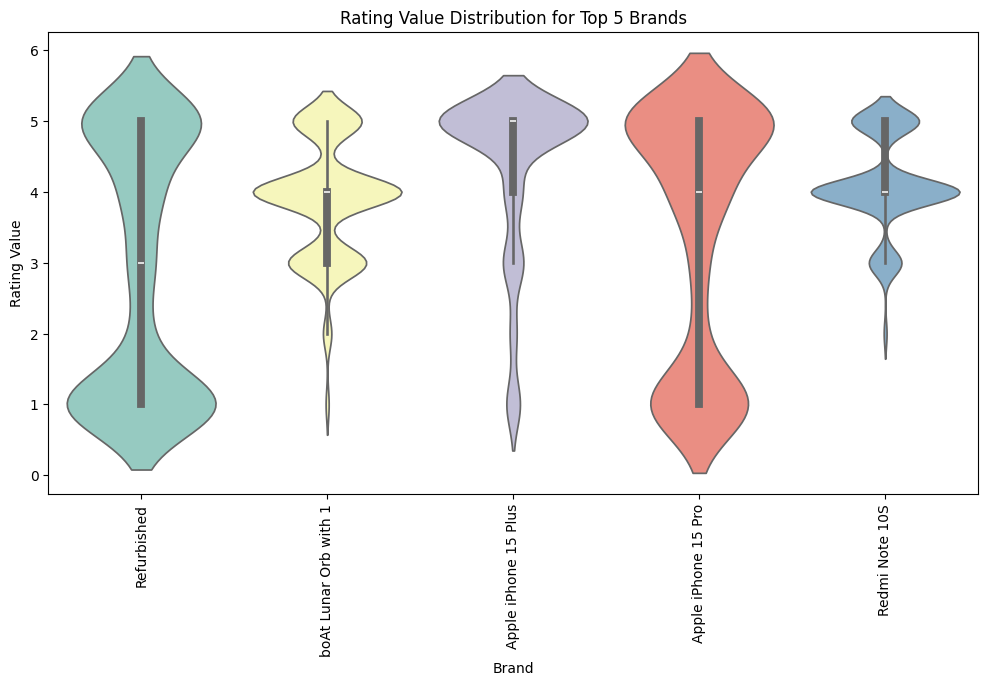

In [ ]:
# Plot 14: Violin Plot of Rating Value Distribution for Top 5 Brands
top_5_brands = df['Brand_name'].value_counts().head(5).index.tolist()

df_top_5_brands = df[df['Brand_name'].isin(top_5_brands)]

plt.figure(figsize=(12, 6))
sns.violinplot(x="Brand_name", y="Rating_value", data=df_top_5_brands, palette="Set3")
plt.title('Rating Value Distribution for Top 5 Brands')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Rating Value')
plt.show()

<ipython-input-277-f095dd657ba3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand_name', data=df_top_5_brands, palette='Set1', order=df_top_5_brands['Brand_name'].value_counts().index)


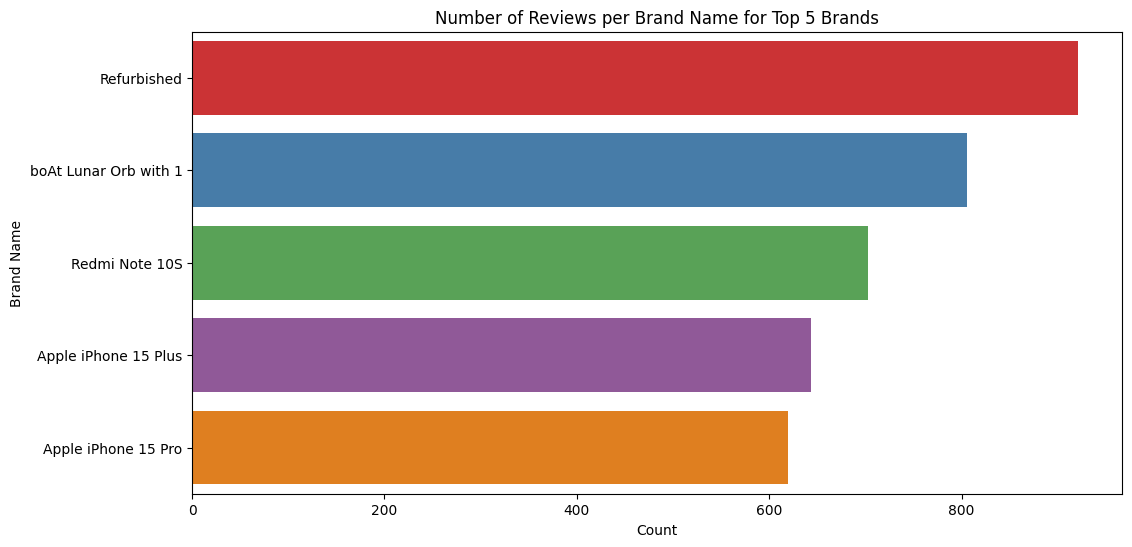

In [ ]:
# Plot 15: Number of Reviews per Brand Name for Top 5 Brands
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand_name', data=df_top_5_brands, palette='Set1', order=df_top_5_brands['Brand_name'].value_counts().index)
plt.title('Number of Reviews per Brand Name for Top 5 Brands')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.show()

<ipython-input-278-3733cc53dc92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_brands, x="Brand_name", y="Review_length", palette="Pastel1")


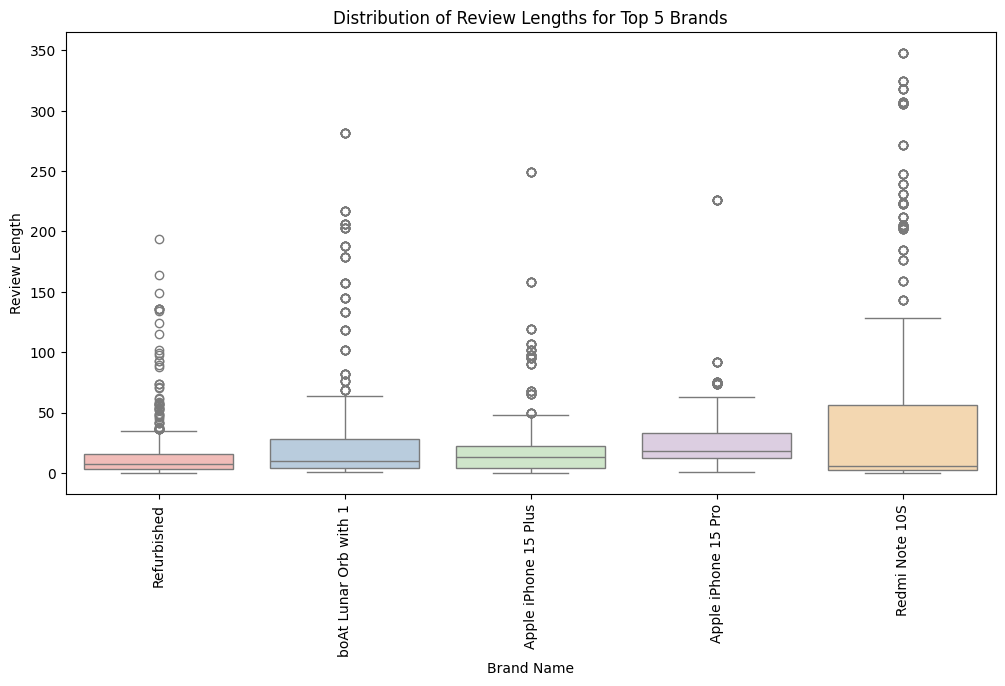

In [ ]:
# Plot 16: Distribution of Review Lengths for Top 5 Brands
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_5_brands, x="Brand_name", y="Review_length", palette="Pastel1")
plt.title('Distribution of Review Lengths for Top 5 Brands')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.ylabel('Review Length')
plt.show()

<ipython-input-279-96348b864c19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_length_bin', y='Rating_value', data=avg_rating_by_review_length_bin, palette='PuBu')


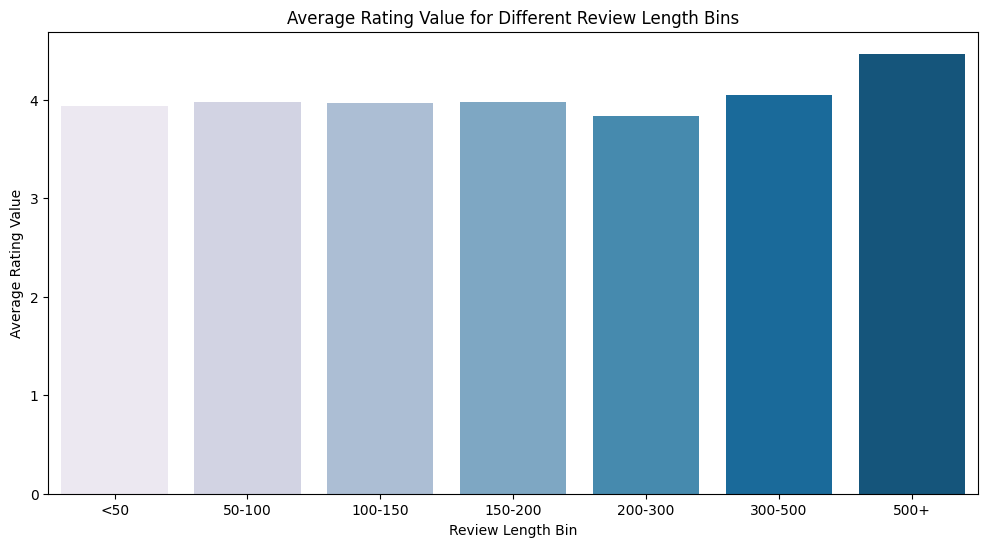

In [ ]:
# Plot 17: Average Rating Value for Different Review Length Bins
avg_rating_by_review_length_bin = df.groupby('Review_length_bin')['Rating_value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Review_length_bin', y='Rating_value', data=avg_rating_by_review_length_bin, palette='PuBu')
plt.title('Average Rating Value for Different Review Length Bins')
plt.xlabel('Review Length Bin')
plt.ylabel('Average Rating Value')
plt.show()

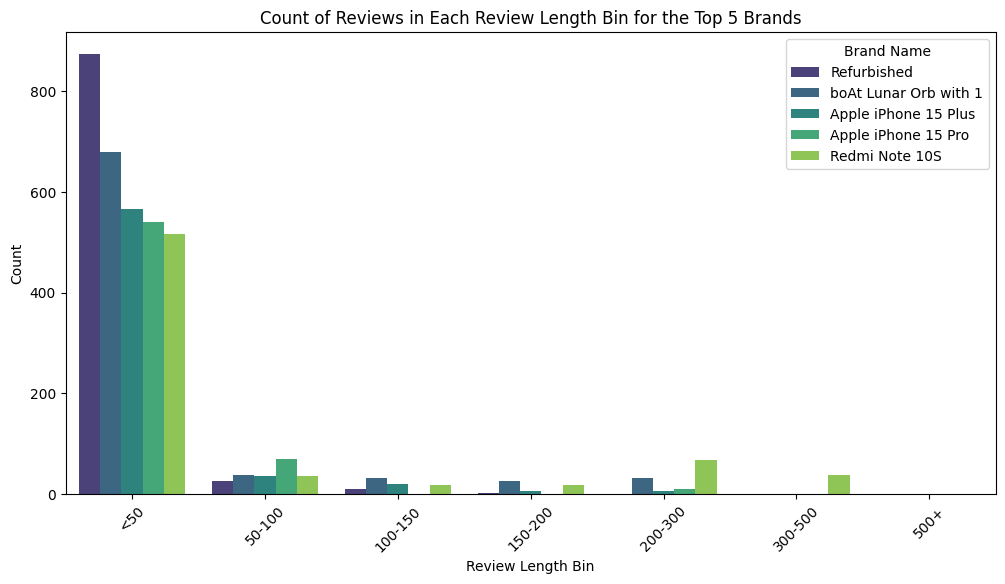

In [ ]:
# Plot 18: Count of Reviews in Each Review Length Bin for the Top 5 Brands
plt.figure(figsize=(12, 6))
sns.countplot(x='Review_length_bin', hue='Brand_name', data=df_top_5_brands, palette='viridis')
plt.title('Count of Reviews in Each Review Length Bin for the Top 5 Brands')
plt.xlabel('Review Length Bin')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Brand Name', loc='upper right')
plt.show()

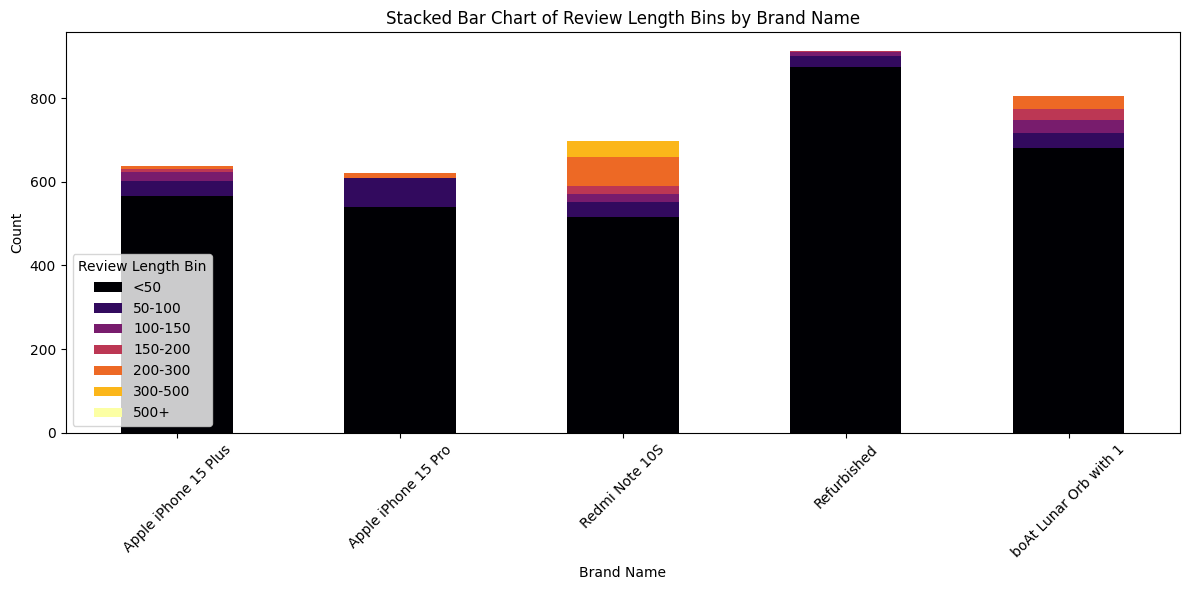

In [ ]:
# Plot 19: Stacked Bar Chart of Review Length Bins by Brand Name (Top 5 Brands)
review_length_brand_pivot = pd.pivot_table(data=df_top_5_brands, values='Name', index='Brand_name', columns='Review_length_bin', aggfunc='count', fill_value=0)

review_length_brand_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='inferno')
plt.title('Stacked Bar Chart of Review Length Bins by Brand Name')
plt.xlabel('Brand Name')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Review Length Bin')
plt.tight_layout()
plt.show()

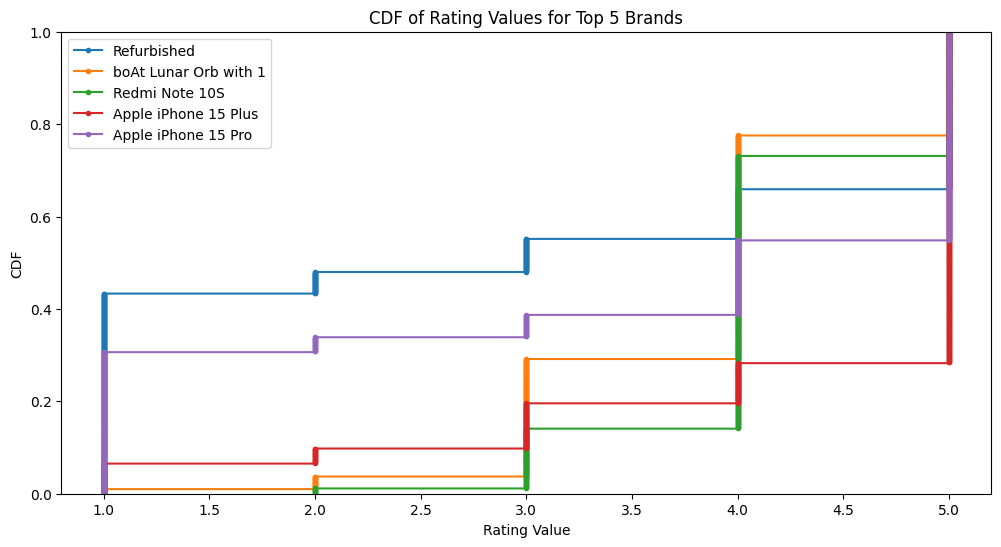

In [ ]:
# Plot 20: Cumulative Distribution Function (CDF) of Rating Values for Top 5 Brands
plt.figure(figsize=(12, 6))
for brand in top_5_brands:
    subset = df[df['Brand_name'] == brand]
    sns.ecdfplot(data=subset, x="Rating_value", label=brand, marker='.', linestyle='-')
plt.title('CDF of Rating Values for Top 5 Brands')
plt.xlabel('Rating Value')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [ ]:
df.head()

,Name,Rating,Reviews,Brand,Rating_value,Brand_name,Review_length,Review_length_bin
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,6,<50
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,4,<50
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,57,50-100
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,19,<50
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,29,<50


In [ ]:
# Rules for categorizing sentiment based on rating value
def categorize_sentiment(rating):
    if rating >= 4.0:
        return 'Positive'
    elif rating == 3.0:
        return 'Neutral'
    else:
        return 'Negative'

# Creating the 'Sentiment' column
df['Sentiment'] = df['Rating_value'].apply(categorize_sentiment)

# Previewing the DataFrame to check if everything is implemented correctly
df.head()
df['Reviews'] = df['Reviews'].str.replace(r'\(refurbished\)', '')
df.head()


<ipython-input-333-6bf2c7279dcd>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace(r'\(refurbished\)', '')


,Name,Rating,Reviews,Brand,Rating_value,Brand_name,Review_length,Review_length_bin,Sentiment
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,6,<50,Neutral
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,4,<50,Neutral
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,57,50-100,Positive
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,19,<50,Positive
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,29,<50,Positive


In [ ]:
df.head()

,Name,Rating,Reviews,Brand,Rating_value,Brand_name,Review_length,Review_length_bin,Sentiment
0,Placeholder,3.0 out of 5 stars,worst working battery staying one hour,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,6,<50,Neutral
1,Good but calling features not available,3.0 out of 5 stars,good calling feature available,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",3.0,boAt Wave Prime47 Smart Watch with 1,4,<50,Neutral
2,Nilesh,4.0 out of 5 stars,from long time i looking entry level smart wat...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,57,50-100,Positive
3,kinjal,4.0 out of 5 stars,good daily use specially kid he love game com...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,19,<50,Positive
4,Placeholder,4.0 out of 5 stars,it s month i bought watch it s working good ...,"boAt Wave Prime47 Smart Watch with 1.69"" HD Di...",4.0,boAt Wave Prime47 Smart Watch with 1,29,<50,Positive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.columns

Index(['Name', 'Rating', 'Reviews', 'Brand', 'Rating_value', 'Brand_name',
       'Review_length', 'Review_length_bin'],
      dtype='object')

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], test_size=0.2, random_state=42)

# Define a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Make predictions on new data
new_reviews = ["This product is great!", "I'm not satisfied with the service."]
new_predictions = pipeline.predict(new_reviews)
print("Predictions on new data:")
for review, prediction in zip(new_reviews, new_predictions):
    print(f"Review: {review} | Predicted Sentiment: {prediction}")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.77      0.83       808
     Neutral       0.95      0.70      0.81       809
    Positive       0.93      0.99      0.96      5130

    accuracy                           0.93      6747
   macro avg       0.93      0.82      0.87      6747
weighted avg       0.93      0.93      0.93      6747

Predictions on new data:
Review: This product is great! | Predicted Sentiment: Positive
Review: I'm not satisfied with the service. | Predicted Sentiment: Positive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

In [ ]:

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate models
for name, model in models.items():
    # Define pipeline with TF-IDF vectorizer and model
    pipeline = make_pipeline(TfidfVectorizer(), model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to display performance metrics
results_df = pd.DataFrame({
    "Model": models.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

# Display the performance metrics table
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Negative' 'Neutral' 'Positive']

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

# Train and evaluate models
for name, model in models.items():
    # Define pipeline with TF-IDF vectorizer and model
    pipeline = make_pipeline(TfidfVectorizer(), model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = pipeline.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Plot ROC AUC curve
    plot_roc_curve(pipeline, X_test, y_test)
    plt.title(f'ROC AUC Curve for {name}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Plot random guess line
    plt.show()

In [ ]:
#### Deep Learning Model